In [1]:
def preprocess(dataset):
    dataset = dataset.split("\n")
    dataset_clean = []
    for item in dataset:
        try:
            dataset_clean.append(float(item.strip()))
        except ValueError:
            pass
    return dataset_clean
    
## Dataset 1 (D1)
with open("data-l3-p-1a.txt", "r") as data_file:
    d1 = data_file.read()
d1 = preprocess(d1)

## Dataset 2 (D2)
with open("data-l3-p-1b.txt", "r") as data_file:
    d2 = data_file.read()
d2 = preprocess(d2)

### Questão 2

#### Obter os parâmetros de MLE considerando cada dataset e que a distribuição é normal
Conforme demonstrado no exercício 1, o MLE considerando uma distribuição normal é dado quando se tem os parâmetros:

$\hat{\mu} = \frac{1}{N} \sum_{j=1}^{N} x_j$

$\hat{\sigma}^2 = \frac{1}{N} \sum_{j=1}^{N} (x_j - \mu)^2$

Que são respectivamente a média e a variância da amostra.

In [2]:
import math

In [3]:
def sum_var(x, mu):
    total = []
    for item in x:
        total.append((item-mu)**2)
    return sum(total)

def variancia(x, mu):
    return sum_var(x,mu)/len(x)

mu_d1 = sum(d1)/len(d1)
sigma_d1 = math.sqrt(variancia(d1, mu_d1))

mu_d2 = sum(d2)/len(d2)
sigma_d2 = math.sqrt(variancia(d2, mu_d2))

print("O dataset D1 tem media (μ) %.2f e desvio padrão (σ) %.2f" % (mu_d1, sigma_d1))
print("O dataset D2 tem media (μ) %.2f e desvio padrão (σ) %.2f" % (mu_d2, sigma_d2))



O dataset D1 tem media (μ) 11.78 e desvio padrão (σ) 4.66
O dataset D2 tem media (μ) 10.65 e desvio padrão (σ) 5.40


#### Obter os parâmetros de MLE considerando cada dataset e que a distribuição é uniforme
Considere a distribuição uniforme:
$ p(x) = \frac{1}{b-a}\mathbb{I} (x \; \epsilon \;[a, b]) $

Conforme demonstrado nos exercícios da lista anterior, o MLE considerando uma distribuição uniforme é dado quando se tem os parâmetros:

$\hat{a} = min(x) $

$\hat{b} = max(x) $

In [4]:
a_d1 = min(d1)
b_d1 = max(d1)

a_d2 = min(d2)
b_d2 = max(d2)

print("O dataset D1 possui seu menor valor (a) em %.2f e maior valor (b) em %.2f" % (a_d1, b_d1))
print("O dataset D2 possui seu menor valor (a) em %.2f e maior valor (b) em %.2f" % (a_d2, b_d2))

O dataset D1 possui seu menor valor (a) em 1.14 e maior valor (b) em 22.76
O dataset D2 possui seu menor valor (a) em 1.05 e maior valor (b) em 19.92


#### A probabilidade de que uma observação seja encontrada em uma distribuição normal é dada por:
$ p(x_j) = (2\pi\sigma^2)^{-1/2} \; e^{\frac{-1}{2\sigma^2}(x_j-\mu)^2} $

Logo, o likelihood de um dataset dada essa distribuição, considerando eventos independentes é dado por:

$ L(\theta=\{\mu, \sigma\}, D) = \prod_{j=1}^{N}[(2\pi\sigma^2)^{-1/2}\; e^{\frac{-1}{2\sigma^2}(x_j-\mu)^2}] = (2\pi\sigma^2)^ {-N/2} \; e^{\frac{-1}{2\sigma^2}\sum_{i=j}^{N}(x_j-\mu)^2} $

#### A probabilidade de que uma observação seja encontrada em uma distribuição uniforme é dada por:
$ p(x_j) = \frac{1}{b-a}\mathbb{I} (x_j \; \epsilon \;[a, b]) $

Logo, o likelihood de um dataset dada essa distribuição, considerando eventos independentes é dado por:

$ L(\theta=\{a, b\}, D) = \prod_{j=1}^{N}\frac{1}{b-a}\mathbb{I} (x_j \; \epsilon \; [a, b]) = (\frac{1}{b-a})^N $

In [5]:
def likelihood_normal(dataset, mu, sigma):
    l = (2*math.pi*sigma**2)**(-len(dataset)/2) * math.exp(-1/(2*sigma**2) * sum_var(dataset, mu))
    return l

def likelihood_uniforme(dataset, a, b):
    l = (1/(b-a))**len(dataset)
    return l

def print_distribution(normal, uniforme, nome):
    print("DATASET %s" % nome)
    print("Likelihood da distribuição normal: %.2g" % normal)
    print("Likelihood da distribuição uniforme: %.2g" % uniforme)
    
    if normal > uniforme:
        print("O dataset %s possui maior probabilidade de ter vindo de uma distribuição normal." % nome)
    else:
        print("O dataset %s possui maior probabilidade de ter vindo de uma distribuição uniforme." % nome)

l1_normal = likelihood_normal(d1, mu_d1, sigma_d1)
l1_uniforme = likelihood_uniforme(d1, a_d1, b_d1)

l2_normal = likelihood_normal(d2, mu_d2, sigma_d2)
l2_uniforme = likelihood_uniforme(d1, a_d2, b_d2)

print_distribution(l1_normal, l1_uniforme, "D1")
print("\n")
print_distribution(l2_normal, l2_uniforme, "D2")

DATASET D1
Likelihood da distribuição normal: 3.6e-129
Likelihood da distribuição uniforme: 3.2e-134
O dataset D1 possui maior probabilidade de ter vindo de uma distribuição normal.


DATASET D2
Likelihood da distribuição normal: 1.4e-135
Likelihood da distribuição uniforme: 2.7e-128
O dataset D2 possui maior probabilidade de ter vindo de uma distribuição uniforme.


#### Gráfico dos dados

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


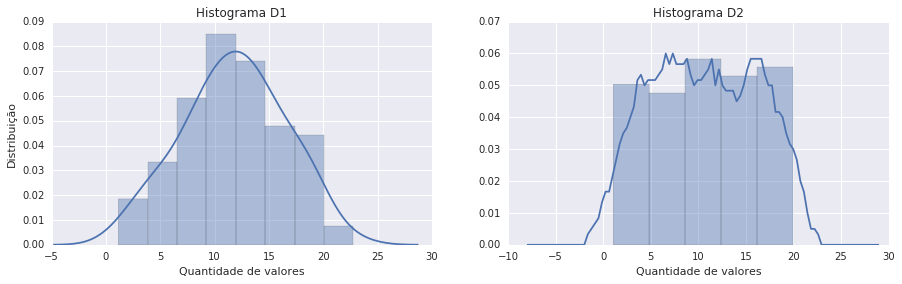

In [55]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(d1, ax=ax1)
ax1.set_title("Histograma D1")
ax1.set_xlabel('Quantidade de valores')
ax1.set_ylabel('Distribuição')
sns.distplot(d2, kde_kws={"kernel":"uni", "bw": 3}, ax=ax2)
ax2.set_title("Histograma D2")
ax2.set_xlabel('Quantidade de valores')

Após analisar o likelihood, é possível confirmar com o plot de histograma dos gráficos que o D1 possui realmente o formato de uma distribuição normal, enquanto o D2 é mais parecido visualmente com uma distribuição uniforme.